In [2]:
# %matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Business Understanding

1) Which of the property_type is costlier ?  
2) Which of the room_type is costlier ?  
3) Which area is costlier - Seattle / Boston ?  

## 2. Data Understanding

In [17]:
# Seattle Data
seattle_data = pd.read_csv("C:\\Users\\hp\Downloads\\seattle_listings.csv")
seattle_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
# Boston data
boston_data = pd.read_csv("C:\\Users\\hp\Downloads\\boston_listings.csv")
boston_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
seattle_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [9]:
seattle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [6]:
boston_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [8]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [4]:
# Null values are present so should be removed
seattle_data.isna().sum()

property_type     1
room_type         0
accommodates      0
bathrooms        16
bedrooms          6
beds              1
price             0
dtype: int64

In [19]:
boston_data.isna().sum()

property_type     3
room_type         0
accommodates      0
bathrooms        14
bedrooms         10
beds              9
price             0
dtype: int64

In [7]:
# Price datatpye is string so should be converted to numeric
seattle_data.dtypes

property_type     object
room_type         object
accommodates       int64
bathrooms        float64
bedrooms         float64
beds             float64
price             object
dtype: object

In [22]:
boston_data.dtypes

property_type     object
room_type         object
accommodates       int64
bathrooms        float64
bedrooms         float64
beds             float64
price             object
dtype: object

In [10]:
# We reatain only the top 4 which constitute almost 95% of the data
seattle_data.property_type.value_counts()

House              1723
Apartment          1698
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                21
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                1
Yurt                  1
Name: property_type, dtype: int64

In [25]:
boston_data.property_type.value_counts()

Apartment          2592
House               556
Condominium         231
Townhouse            54
Bed & Breakfast      39
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [13]:
seattle_data['room_type'].value_counts()

Entire home/apt    2434
Private room       1087
Shared room         109
Name: room_type, dtype: int64

In [28]:
boston_data['room_type'].value_counts()

Entire home/apt    2062
Private room       1299
Shared room          72
Name: room_type, dtype: int64

## 3. Data Preparation

In [18]:

def clean_data(df):
    '''Function to clean the raw data given
    
    INPUT
    df: dataframe to be cleaned
    
    OUTPUT
    df: cleaned dataframe
    '''
    # Using only the features required (numeric data) for primary analysis of the dataset
    df = df[['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']]
    # Remove null values
    df.dropna(inplace = True)
    # Converting price to numeric
    df['price'] = df['price'].apply(lambda x: x.strip()[1:])
    df['price'] = df['price'].apply(lambda x: x.replace(',',''))
    df['price'] = pd.to_numeric(df['price'])
    # Retaining top 4 property_types
    df=df[(df['property_type'] == 'Apartment')|(df['property_type'] == 'House')|(df['property_type'] == 'Townhouse')|(df['property_type'] == 'Condominium')]
    return df

### Seattle Data

In [21]:
seattle_data = clean_data(seattle_data)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [22]:
seattle_data.head()

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price
0,Apartment,Entire home/apt,4,1.0,1.0,1.0,85.0
1,Apartment,Entire home/apt,4,1.0,1.0,1.0,150.0
2,House,Entire home/apt,11,4.5,5.0,7.0,975.0
3,Apartment,Entire home/apt,3,1.0,0.0,2.0,100.0
4,House,Entire home/apt,6,2.0,3.0,3.0,450.0


In [23]:
boston_data = clean_data(boston_data)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [24]:
boston_data.head()

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price
0,House,Entire home/apt,4,1.5,2.0,3.0,250.0
1,Apartment,Private room,2,1.0,1.0,1.0,65.0
2,Apartment,Private room,2,1.0,1.0,1.0,65.0
3,House,Private room,4,1.0,1.0,2.0,75.0
4,House,Private room,2,1.5,1.0,2.0,79.0


## 4. Modelling

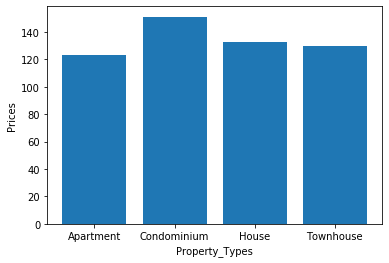

In [39]:
plt.bar(seattle_data['property_type'].sort_values().unique(), seattle_data.groupby('property_type', sort = True)['price'].mean())
plt.xlabel('Property_Types')
plt.ylabel('Prices')
plt.savefig('seattle_property.png')

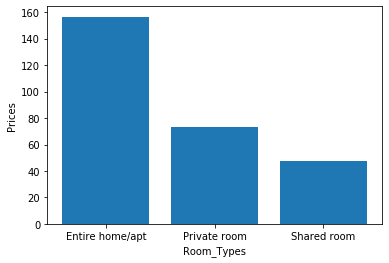

In [40]:
plt.bar(seattle_data['room_type'].sort_values().unique(), seattle_data.groupby('room_type', sort = True)['price'].mean())
plt.xlabel('Room_Types')
plt.ylabel('Prices')
plt.savefig('seattle_room.png')

# Boston Data

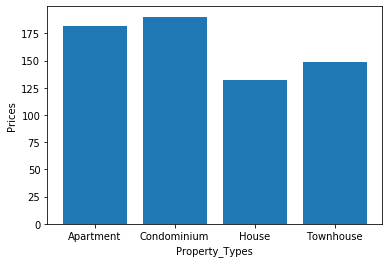

In [41]:
plt.bar(boston_data['property_type'].sort_values().unique(), boston_data.groupby('property_type', sort = True)['price'].mean())
plt.xlabel('Property_Types')
plt.ylabel('Prices')
plt.savefig('boston_property.png')

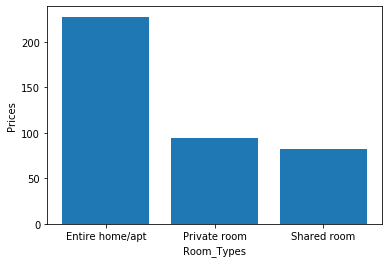

In [42]:
plt.bar(boston_data['room_type'].sort_values().unique(), boston_data.groupby('room_type', sort = True)['price'].mean())
plt.xlabel('Room_Types')
plt.ylabel('Prices')
plt.savefig('boston_room.png')

# Seattle vs Boston

In [43]:
seattle_property_means = np.array(seattle_data.groupby('property_type', sort=True)['price'].mean())
seattle_room_means = np.array(seattle_data.groupby('room_type', sort=True)['price'].mean())

In [44]:
boston_property_means = np.array(boston_data.groupby('property_type', sort=True)['price'].mean())
boston_room_means = np.array(boston_data.groupby('room_type', sort=True)['price'].mean())

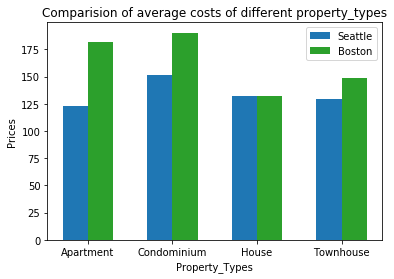

In [45]:
y1 = seattle_property_means
y2 = boston_property_means

x = np.arange(len(y1))
width = 0.3

fig, axes = plt.subplots(ncols=1, nrows=1)
plt.title('Comparision of average costs of different property_types')

plt.xlabel('Property_Types')
plt.ylabel('Prices')
axes.bar(x, y1, width=-1.*width, align='edge', label="Seattle")
axes.bar(x, y2, width=width, align='edge', color=list(plt.rcParams['axes.prop_cycle'])[2]['color'], label="Boston")
axes.set_xticks(x)
axes.set_xticklabels(['Apartment', 'Condominium', 'House', 'Townhouse'])
plt.legend()
plt.savefig('sb_property.png')

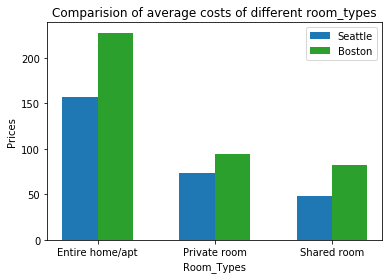

In [46]:
y1 = seattle_room_means
y2 = boston_room_means
x = np.arange(len(y1))
width = 0.3

fig, axes = plt.subplots(ncols=1, nrows=1)
plt.title('Comparision of average costs of different room_types')

plt.xlabel('Room_Types')
plt.ylabel('Prices')
axes.bar(x, y1, width=-1.*width, align='edge', label="Seattle")
axes.bar(x, y2, width=width, align='edge', color=list(plt.rcParams['axes.prop_cycle'])[2]['color'], label="Boston")
axes.set_xticks(x)
axes.set_xticklabels(['Entire home/apt', 'Private room', 'Shared room'])
plt.legend()
plt.savefig('sb_room.png')

## 5. Evaluation

It is seen than the average prices of houses in Boston are greater than those in Seattle for each of the property_type and room_type